## EDA

Antes de iniciar a responder preguntas, visualicemos y entendamos la data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import os
from scipy import stats
%matplotlib inline

In [ ]:
# Read de data
path = os.path.join(os.getcwd(), os.pardir, 'data', 'processed')
df = pd.read_csv(os.path.join(path, 'survey.csv'), index_col='ResponseId')

In [ ]:
df.sample(5)

,Age,Gender,Sexuality,Country,EdLevel,LearnCode,YearsCode,YearsCodePro,Employment,ConvertedCompYearly,YearsLearnPro,Degree
ResponseId,,,,,,,,,,,,
46333,35-44 years old,Man,Straight / Heterosexual,Brazil,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Non-traditional,24.0,21.0,Employed,57720.0,3.0,Yes
66993,35-44 years old,Man,Straight / Heterosexual,Costa Rica,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Both,18.0,15.0,"Independent contractor, freelancer, or self-em...",100000.0,3.0,Yes
66973,25-34 years old,Man,Straight / Heterosexual,Mexico,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Both,14.0,10.0,Employed,NaN,4.0,Yes
48787,25-34 years old,Man,Straight / Heterosexual,Spain,Some college/university study without earning ...,Non-traditional,10.0,6.0,"Independent contractor, freelancer, or self-em...",51887.0,4.0,No
80389,25-34 years old,Man,Straight / Heterosexual,Spain,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Non-traditional,4.0,NaN,Employed,NaN,NaN,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6295 entries, 12 to 83439
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6269 non-null   object 
 1   Gender               6295 non-null   object 
 2   Sexuality            6295 non-null   object 
 3   Country              6295 non-null   object 
 4   EdLevel              6284 non-null   object 
 5   LearnCode            6276 non-null   object 
 6   YearsCode            6220 non-null   float64
 7   YearsCodePro         5155 non-null   float64
 8   Employment           6293 non-null   object 
 9   ConvertedCompYearly  4388 non-null   float64
 10  YearsLearnPro        5147 non-null   float64
 11  Degree               6295 non-null   object 
dtypes: float64(4), object(8)
memory usage: 639.3+ KB


In [ ]:
df.describe()

,YearsCode,YearsCodePro,ConvertedCompYearly,YearsLearnPro
count,6220.000000,5155.000000,4.388000e+03,5147.000000
mean,12.118408,8.821629,4.906186e+04,4.724500
std,8.698174,7.477424,1.371665e+05,3.614725
min,0.500000,0.500000,1.200000e+01,0.000000
25%,6.000000,3.000000,1.567200e+04,2.000000
50%,10.000000,6.000000,2.810500e+04,4.000000
75%,16.000000,12.000000,4.718400e+04,6.000000
max,50.000000,50.000000,4.656132e+06,31.000000


Los salarios tienen una desviación estándar muy grande, podríamos usar otros estadísticos como la trim mean

In [ ]:
stats.trim_mean(df.ConvertedCompYearly.dropna(), 0.2)

29632.66514806378

Función para gráficas de barras horizontales normalizadas (este tipo de gráfica se pude aplicar a varias de las preguntas de la encuesta al ser variables categóricas):

In [ ]:
# Set styles
sns.set_theme()
pio.templates.default = 'ggplot2'

In [ ]:
def barploth_normalized(data, title='Title', figsize=(9, 5), padding=-30, label=True):

    if data.shape[0] < 30:
        df_plot = data
    else:
        df_plot = data.value_counts(normalize=True)

    fig, ax = plt.subplots(figsize=figsize)
    ax = sns.barplot(x=round(df_plot*100, 1), y=df_plot.index)
    if label:
        ax.bar_label(ax.containers[0], padding=padding, size=11)
    plt.title(title, size=15)
    plt.xlabel('Porcentaje (%)', size=13)
    plt.margins(0.02)
    plt.show()

### Demográficos

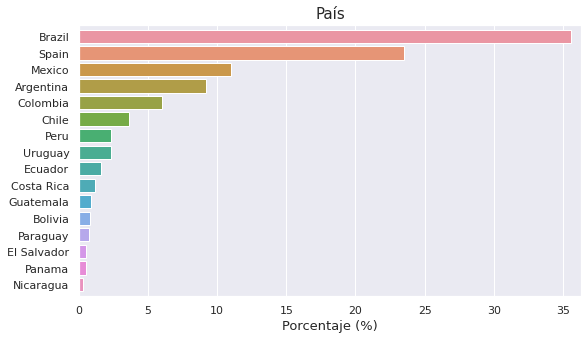

In [ ]:
barploth_normalized(data=df.Country, title='País', label=False)

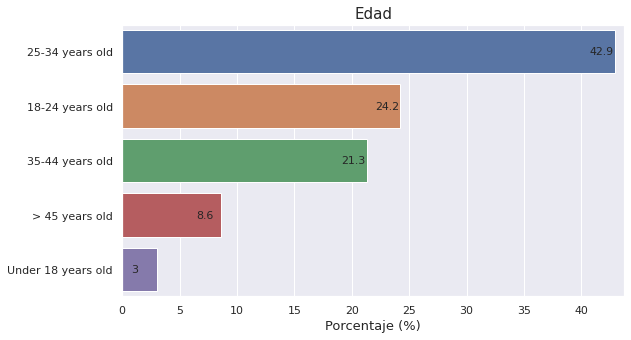

In [ ]:
barploth_normalized(df.Age, title='Edad', padding=-25)

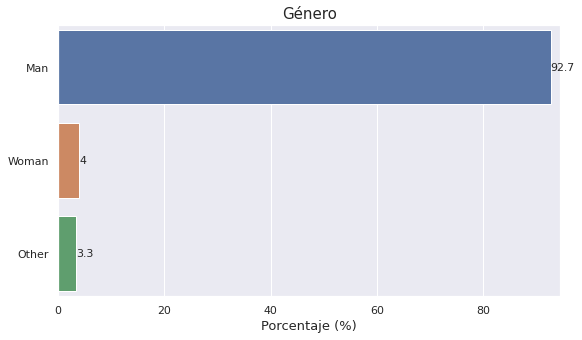

In [ ]:
barploth_normalized(df.Gender, title='Género', padding=0)

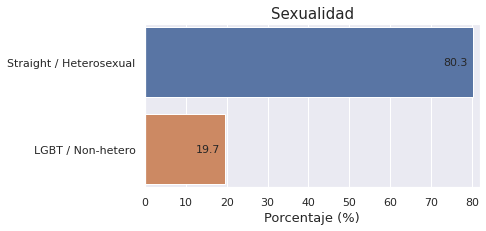

In [ ]:
barploth_normalized(df.Sexuality, title='Sexualidad', figsize=(6, 3))

* Las personas encuestadas que se identificaron como hombres son el 92%. Esto muestra una fuerte desigualdad de género.

* De la misma forma, personas que se identifican como no heterosexuales son minoría (19.7%).

### Educación

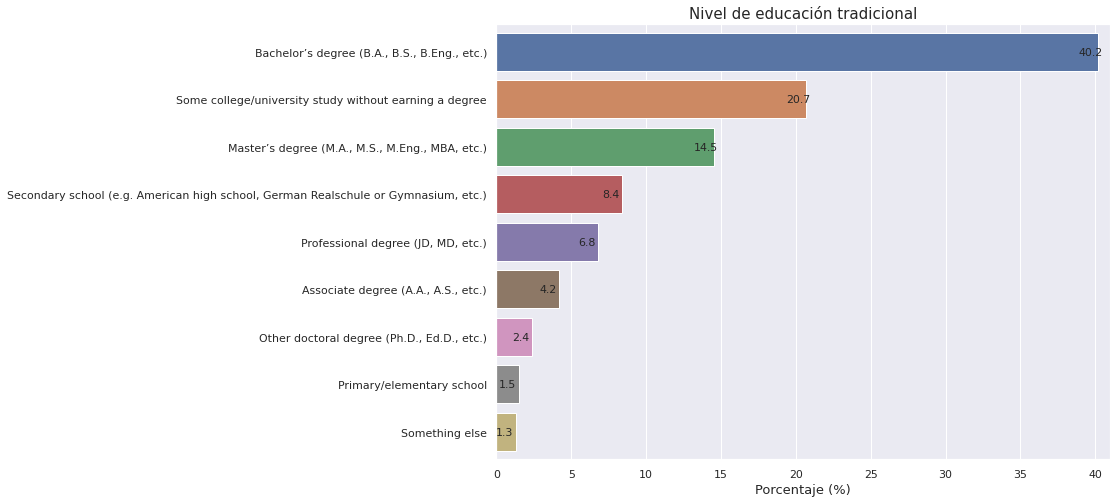

In [ ]:
barploth_normalized(df.EdLevel, title='Nivel de educación tradicional', padding=-20, figsize=(11,8))

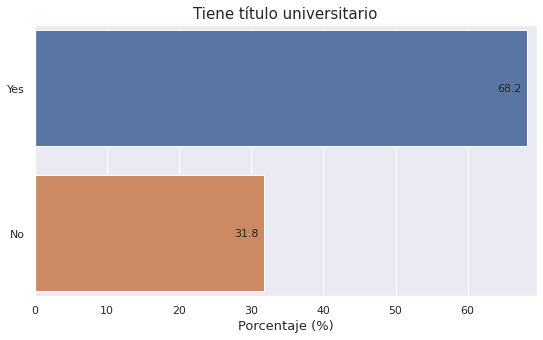

In [ ]:
barploth_normalized(df.Degree, title='Tiene título universitario', padding=-30)

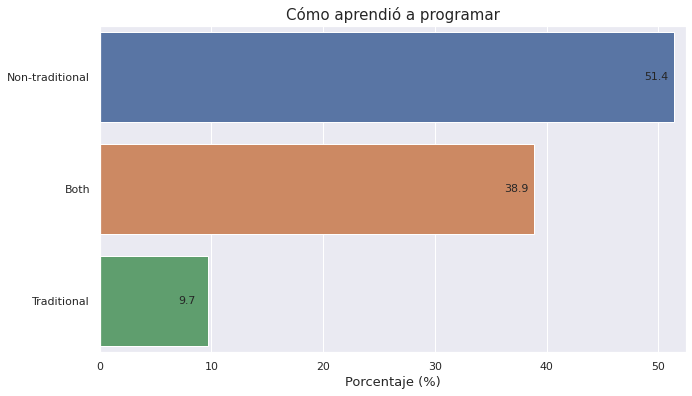

In [ ]:
barploth_normalized(df.LearnCode, title='Cómo aprendió a programar', figsize=(10.5, 6))

In [ ]:
px.histogram(df, x='YearsLearnPro', marginal='box', title='Años desde que empezó a aprender código hasta ser profesional', nbins=50)

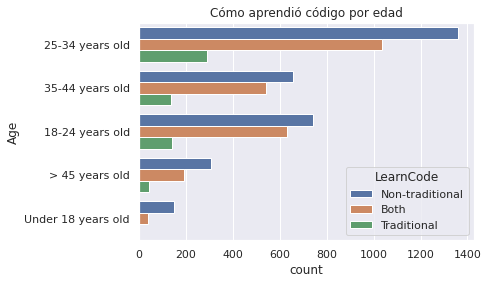

In [ ]:
sns.countplot(y=df.Age, hue=df.LearnCode, hue_order=['Non-traditional', 'Both', 'Traditional'])
plt.title('Cómo aprendió código por edad')
plt.show()

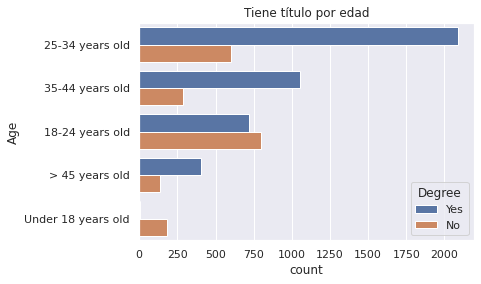

In [ ]:
sns.countplot(y=df.Age, hue=df.Degree)
plt.title('Tiene título por edad')
plt.show()

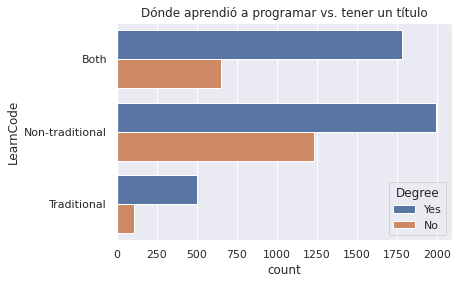

In [ ]:
sns.countplot(y=df.LearnCode, hue=df.Degree)
plt.title('Dónde aprendió a programar vs. tener un título')
plt.show()

* La mayoría tiene estudios superiores. Pero pocas personas dicen haber aprendido en la universidad. Esto sugiere que la mayoría aprendió de forma autodidacta o no tradicional.

* Casi el 90% hizo su primer programa antes de los 24 años.

* La mayoría de los encuestados tardó entre 2 y 6 años en conseguir su primer empleo desde que empezó a aprender a programar.

* Para todos los rangos de edad la forma de aprender a programar se comporta igual, la mayoría aprendieron a programar de maneras no tradicionales.

### Empleo

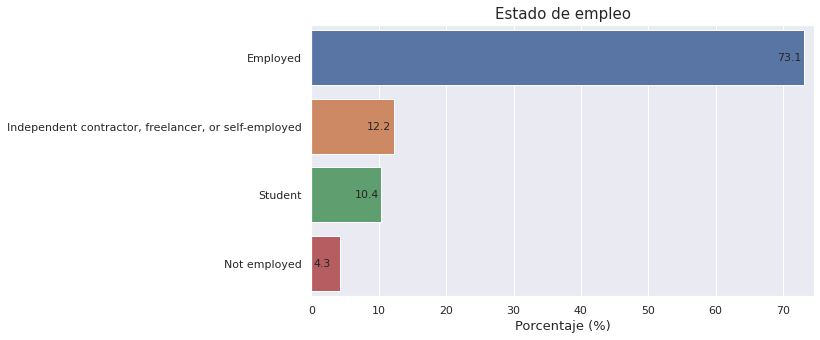

In [ ]:
barploth_normalized(df.Employment, title='Estado de empleo', padding=-27)

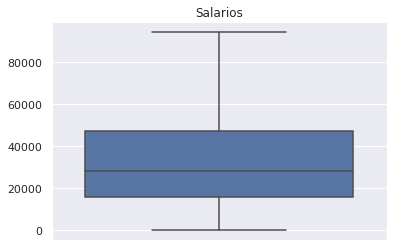

In [ ]:
# px.histogram(df, x='ConvertedCompYearly', marginal='box', title='Salarios')
sns.boxplot(y='ConvertedCompYearly', data=df, showfliers=False)
plt.title('Salarios')
plt.ylabel(None)
plt.show()

- El 85% de los encuestados tienen empleo.
- Sus ganancias rondan entre 15.6k y 47.2k dólares anuales. Y hay varios outliers con ganancias mucho mayores.

# Bi and multivariate EDA

### Género y compensación

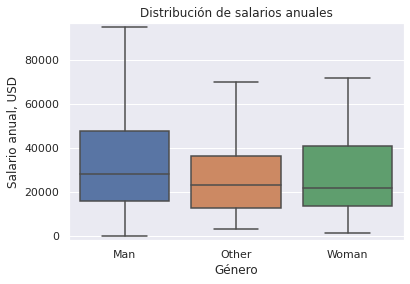

In [ ]:
fig, ax = plt.subplots()
ax = sns.boxplot(x="Gender", y="ConvertedCompYearly", data=df, showfliers=False)
plt.title('Distribución de salarios anuales')
plt.xlabel('Género')
plt.ylabel('Salario anual, USD')
plt.margins(0.02)
plt.show()

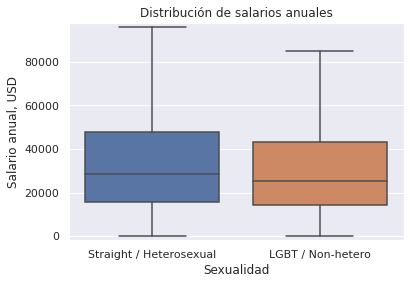

In [ ]:
fig, ax = plt.subplots()
ax = sns.boxplot(x="Sexuality", y="ConvertedCompYearly", data=df, showfliers=False)
plt.title('Distribución de salarios anuales')
plt.xlabel('Sexualidad')
plt.ylabel('Salario anual, USD')
plt.margins(0.02)
plt.show()

A simple vista podemos ver que:
- Los hombres ganan más que las mujeres.
- Quienes afirman ser heterosexuales ganan más que los que no.
- Quienes afirman no ser transgénero ganan más que quienes sí lo hacen.

En el siguiente notebook se harán test de hipótesis para comprobarlo

### Edades y salarios

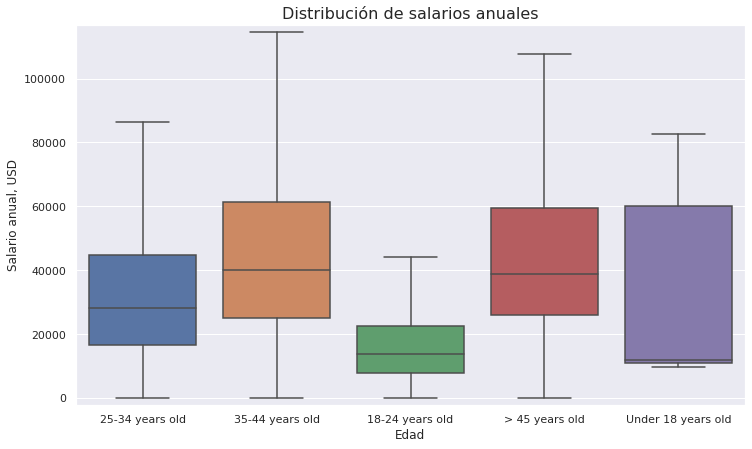

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
ax = sns.boxplot(x="Age", y="ConvertedCompYearly", data=df, showfliers=False)
plt.title('Distribución de salarios anuales', size=16)
plt.xlabel('Edad')
plt.ylabel('Salario anual, USD')
plt.margins(0.02)
plt.show()

- A partir de los 35 años se tiende a ganar más.
- Los datos de personas de menos de 18 años se deben descartar porque la muestra es muy pequeña.

### Educación y salario

In [ ]:
df.groupby(['Age', 'LearnCode'])['ConvertedCompYearly'].median().round(2)

Age                 LearnCode      
18-24 years old     Both               14796.0
                    Non-traditional    13620.0
                    Traditional        13740.0
25-34 years old     Both               28248.0
                    Non-traditional    27492.0
                    Traditional        31884.0
35-44 years old     Both               39998.0
                    Non-traditional    39037.0
                    Traditional        42000.0
> 45 years old      Both               38849.5
                    Non-traditional    41232.0
                    Traditional        36000.0
Under 18 years old  Both               11760.0
                    Non-traditional    35496.0
                    Traditional            NaN
Name: ConvertedCompYearly, dtype: float64

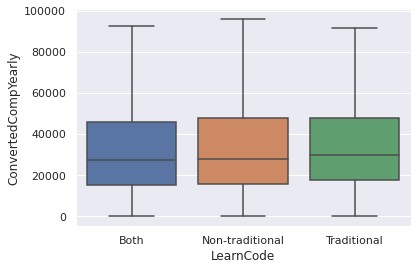

In [ ]:
sns.boxplot(x=df.LearnCode, y=df.ConvertedCompYearly, showfliers=False)
plt.show()

Para analizar el nivel de educación y salario se el revisará si hay suficiente cantidad de registros por cada categoría.

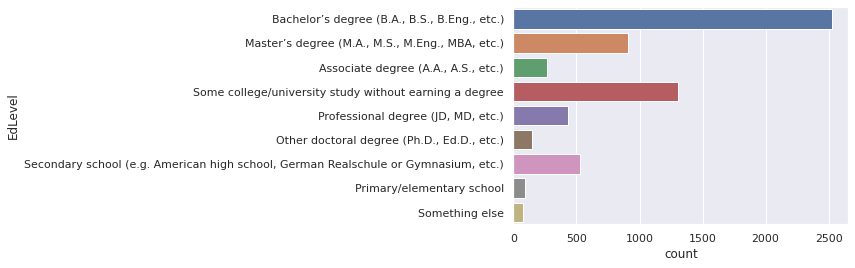

In [ ]:
sns.countplot(y=df.EdLevel)
plt.show()

En `Primary/elementary school` y `Something else` la cuenta es muy baja, por lo que se los descartará para el análisis.

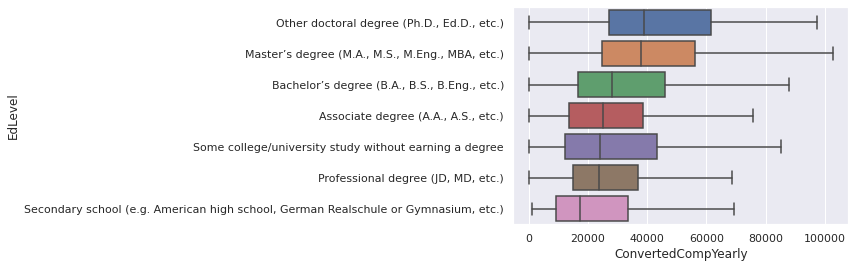

In [ ]:
# New DataFrame
edu = pd.DataFrame(df[['EdLevel', 'ConvertedCompYearly']])
edu.drop(edu.EdLevel[edu.EdLevel.isin(['Primary/elementary school', 'Something else'])].index, inplace=True)

# List to order data
median_salary = edu.groupby('EdLevel')[['ConvertedCompYearly']].agg(np.median) \
.sort_values(by='ConvertedCompYearly', ascending=False)

# Plot
sns.boxplot(y=edu.EdLevel, 
            x=edu.ConvertedCompYearly, 
            order=list(median_salary.index), 
            showfliers=False)
plt.show()

#### Tienen empleo o no según tipo de educación

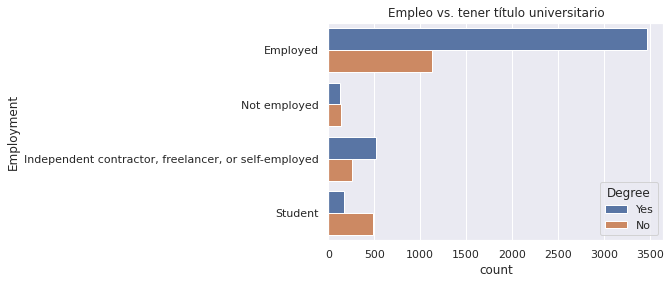

In [ ]:
sns.countplot(y=df.Employment, hue=df.Degree)
plt.title('Empleo vs. tener título universitario')
plt.show()

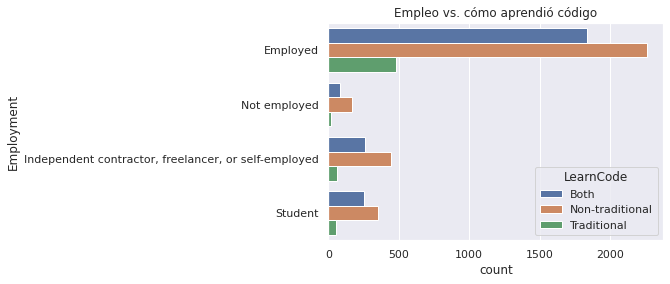

In [ ]:
sns.countplot(y=df.Employment, hue=df.LearnCode)
plt.title('Empleo vs. cómo aprendió código')
plt.show()

- Para los grupos con empleo, domina el tener título y aprender código de manera no tradicional.
- Para los grupos sin empleo y estudiantes, es más común no tener título. También su principal forma de aprender es de manera no tradicional.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=09491c61-3767-4289-98fd-88aee19bb45d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>